In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df1 = pd.read_csv("GSE52194.csv")
df2 = pd.read_csv("GSE69240.csv")
df3 = pd.read_csv("GSE71651.csv")



In [ ]:
df = pd.concat([df1,df2,df3], axis=0)
df.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,SRR1027171,Tumor,8.063609,2.814594,9.012854,7.923587,7.699059,6.005128,9.187466,7.745746,...,2.327588,1.476355,3.104279,1.476355,1.476355,1.476355,2.900942,2.335066,2.332284,4.801428
1,SRR1027172,Tumor,8.301166,1.476355,8.498698,7.574031,7.822367,5.605807,9.800699,8.548353,...,3.022070,1.476355,1.476355,1.476355,1.476355,1.476355,1.476355,1.476355,1.476355,3.584022
2,SRR1027173,Tumor,8.258444,1.476355,8.770748,8.566797,6.765577,5.890301,11.240224,8.795056,...,3.128227,1.476355,4.811293,1.476355,1.476355,1.476355,5.590334,2.857158,4.836058,5.815458
3,SRR1027174,Tumor,8.418663,3.151186,8.514820,7.507616,7.303084,6.282407,10.256700,8.038915,...,2.374216,1.476355,1.476355,2.944553,1.476355,1.476355,3.389999,2.369124,1.476355,1.476355
4,SRR1027175,Tumor,9.036324,2.594064,9.145899,8.372162,7.244524,5.966569,9.374034,8.568116,...,1.476355,1.476355,3.032861,1.476355,1.476355,1.476355,1.476355,1.476355,3.248608,3.979834


In [ ]:
print(len(df.columns))
print(len(df))
df4 = df.drop('ID', axis=1)

58737
88


In [ ]:
print(df4["class"].unique())
df4['class'] = (df4["class"] == ' Tumor').apply(int)


[' Tumor' ' Normal']


In [ ]:
print(len(df4["class"] == 1))
display(df4)

88


,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,1,8.063609,2.814594,9.012854,7.923587,7.699059,6.005128,9.187466,7.745746,9.087281,...,2.327588,1.476355,3.104279,1.476355,1.476355,1.476355,2.900942,2.335066,2.332284,4.801428
1,1,8.301166,1.476355,8.498698,7.574031,7.822367,5.605807,9.800699,8.548353,8.889988,...,3.022070,1.476355,1.476355,1.476355,1.476355,1.476355,1.476355,1.476355,1.476355,3.584022
2,1,8.258444,1.476355,8.770748,8.566797,6.765577,5.890301,11.240224,8.795056,8.187613,...,3.128227,1.476355,4.811293,1.476355,1.476355,1.476355,5.590334,2.857158,4.836058,5.815458
3,1,8.418663,3.151186,8.514820,7.507616,7.303084,6.282407,10.256700,8.038915,7.940512,...,2.374216,1.476355,1.476355,2.944553,1.476355,1.476355,3.389999,2.369124,1.476355,1.476355
4,1,9.036324,2.594064,9.145899,8.372162,7.244524,5.966569,9.374034,8.568116,8.215491,...,1.476355,1.476355,3.032861,1.476355,1.476355,1.476355,1.476355,1.476355,3.248608,3.979834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1,10.163420,5.795390,8.910083,9.915531,8.036482,7.515345,11.034406,9.973780,9.425414,...,1.873562,1.873562,2.567831,1.873562,1.873562,1.873562,5.150640,1.873562,3.721619,4.358768
29,1,9.977373,5.909457,8.844046,10.065302,8.302285,6.993293,11.441198,9.356788,9.428865,...,1.873562,1.873562,2.653410,1.873562,1.873562,3.187767,5.103384,1.873562,4.128014,4.464575
30,0,9.360885,6.081324,8.784923,9.801867,8.041169,7.009277,11.383322,8.944604,9.024530,...,1.873562,1.873562,3.087668,1.873562,1.873562,1.873562,5.876644,1.873562,4.488172,5.751476
31,0,9.945123,7.288354,8.590931,10.116428,8.607649,6.228883,12.149693,8.921909,9.036773,...,1.873562,1.873562,3.288038,1.873562,1.873562,1.873562,5.400485,1.873562,3.444479,4.579910


In [ ]:

y = df4['class']
df = df4.iloc[:,1:]
print( y.value_counts() )
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df4)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,5))
sns.scatterplot(X_pca[:,0],X_pca[:,1], hue = y)

1    57
0    31
Name: class, dtype: int64


TypeError: ignored

<Figure size 2000x500 with 0 Axes>

##Split dataset into Train and Test & SMOTE Over_Sampling


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = df4.drop(['class'], axis = 1)
print(len(X))
y = df4["class"]
print(len(y))

X = pd.get_dummies(X)
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=43)
print(X_test.shape)

88
88
(23, 58735)


## Train Models

In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
classifiers = [
    LogisticRegression(max_iter=300),
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5, random_state=43),
    RandomForestClassifier(max_depth=5, random_state=43),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"Accuracy of {name} Classifier is:{score}")

Accuracy of Logistic Regression Classifier is:0.9130434782608695
Accuracy of Nearest Neighbors Classifier is:0.8695652173913043
Accuracy of Linear SVM Classifier is:0.9130434782608695
Accuracy of RBF SVM Classifier is:0.391304347826087
Accuracy of Gaussian Process Classifier is:0.9130434782608695
Accuracy of Decision Tree Classifier is:0.782608695652174
Accuracy of Random Forest Classifier is:0.9130434782608695
Accuracy of Neural Net Classifier is:0.391304347826087
Accuracy of AdaBoost Classifier is:0.8695652173913043
Accuracy of Naive Bayes Classifier is:0.8695652173913043


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of QDA Classifier is:0.9565217391304348


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=300,)
lr_model.fit(X_train, y_train)
lr_accuracy = lr_model.score(X_test, y_test)
print(f"Accuracy of Logistic Regression Classifier is:{lr_accuracy}")

Accuracy of Logistic Regression Classifier is:0.9130434782608695


# K Nearest Neighbor Algorithm










In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)
print(f"Accuracy of kNN Classifier is:{knn_accuracy}")

Accuracy of kNN Classifier is:0.8695652173913043


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


 **Linear Support Vector Machines (SVM)**

In [ ]:
from sklearn import svm

svm_model = svm.SVC(random_state=42, kernel='linear')
svm_model.fit(X_train, y_train)

svm_accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy of Linear SVM Classifier is:{svm_accuracy}")

Accuracy of Linear SVM Classifier is:0.9130434782608695


##RBF Support Vector Machines (SVM)





In [ ]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train_scaled, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

KeyboardInterrupt: ignored

In [ ]:
rbf_svm_model = svm.SVC(gamma=0.01, C=25, class_weight={1: 2})
rbf_svm_model.fit(X_train_scaled, y_train)

rbf_svm_accuracy = rbf_svm_model.score(X_test_scaled, y_test)
print(f"Accuracy of RBF SVM Classifier is:{rbf_svm_accuracy}")

Accuracy of RBF SVM Classifier is:0.391304347826087


### Gaussian Process Classifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel, random_state=43, max_iter_predict=10000, n_jobs=-1)
gpc_model.fit(X_train, y_train)

gpc_accuracy = gpc_model.score(X_test, y_test)
print(f"Accuracy of Gaussian Process Classifier is:{gpc_accuracy}")

KeyboardInterrupt: ignored

### Decision Trees





In [ ]:
from sklearn import tree

max_depth_range = np.linspace(1, 10, 10)
param_grid = dict(max_depth=max_depth_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
grid = GridSearchCV(DecisionTreeClassifier(class_weight={1: 0}), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

ValueError: ignored

In [ ]:
tree_model = tree.DecisionTreeClassifier( max_depth=1, random_state=53)
tree_model.fit(X_train, y_train)

tree_accuracy = tree_model.score(X_test, y_test)
print(f"Accuracy of Decision Tree Classifier is:{tree_accuracy}")

Accuracy of Decision Tree Classifier is:0.8260869565217391


### Random Forest





In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_depth_range = np.linspace(1, 27, 27)
max_features_range = np.arange(1, 27, 1)
param_grid = dict(max_depth=max_depth_range, max_features=max_features_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
grid = GridSearchCV(RandomForestClassifier(class_weight={1: 0}, random_state=43), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=25, n_estimators=400, max_features=150, random_state=43, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy of Random Forest Classifier is:{rf_accuracy}")

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=43, max_iter=10000, learning_rate='adaptive')
nn_model.fit(X_train, y_train)
nn_accuracy = nn_model.score(X_test, y_test)
print(f"Accuracy of MLP Classifier is:{nn_accuracy}")

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=43, n_estimators=100)
ada_model.fit(X_train, y_train)
ada_accuracy = ada_model.score(X_test, y_test)
print(f"Accuracy of Ada Boost Classifier is:{ada_accuracy}")

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_accuracy = gnb_model.score(X_test, y_test)
print(f"Accuracy of Gaussian Naive Bayes Classifier is:{gnb_accuracy}")

### Quadratic Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_accuracy = qda_model.score(X_test, y_test)
print(f"Accuracy of Quadratic Discriminant Analysis Classifier is:{qda_accuracy}")

#Classifcation Reports

#Logistic Regreesion

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=300,)
lr_model.fit(X_train, y_train)


In [ ]:
lr_model_pred = lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_model_pred))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

lr_precision, lr_recall, lr_f1_score, lr_support = precision_recall_fscore_support(y_test, lr_model_pred, average="macro" )


In [ ]:
from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(y_test, lr_model_pred)

print("ROC AUC:", lr_auc)



# kNN



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


In [ ]:
knn_model_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_model_pred))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

knn_precision, knn_recall, knn_f1_score, knn_support = precision_recall_fscore_support(y_test, knn_model_pred, average="macro" )



In [ ]:
from sklearn.metrics import roc_auc_score

knn_model_auc = roc_auc_score(y_test, knn_model_pred)

print("ROC AUC:", knn_model_auc)

# Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_model = LinearSVC(max_iter = 1000)
svm_model = svm_model.fit(X_train,y_train)



In [ ]:
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

L_svm_precision, L_svm_recall, L_svm_f1_score, L_svm_support = precision_recall_fscore_support(y_test, svm_pred, average="macro")


In [ ]:
from sklearn.metrics import roc_auc_score

svm_auc = roc_auc_score(y_test, svm_pred)

print("ROC AUC:", svm_auc)

#RBF SVM

In [ ]:
from sklearn import svm

rbf_svm_model = svm.SVC()
rbf_svm_model = rbf_svm_model.fit(X_train, y_train)


In [ ]:
rbf_svm_pred = rbf_svm_model.predict(X_test)
print(classification_report(y_test, rbf_svm_pred))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

rbf_svm_precision, rbf_svm_recall, rbf_svm_f1_score, rbf_svm_support = precision_recall_fscore_support(y_test, rbf_svm_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

rbf_svm_auc = roc_auc_score(y_test, rbf_svm_pred)

print("ROC AUC:", rbf_svm_auc)

#Gaussian Classifer

In [ ]:
kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel, random_state=43, max_iter_predict=10000, n_jobs=-1)
gpc_model.fit(X_train, y_train)

In [ ]:
gpc_pred = gpc_model.predict(X_test)
print(classification_report(y_test, gpc_pred))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

gpc_precision, gpc_recall, gpc_f1_score, gpc_support = precision_recall_fscore_support(y_test, gpc_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

gpc_auc = roc_auc_score(y_test, gpc_pred)

print("ROC AUC:", gpc_auc)

# Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)

In [ ]:
tree_pred = tree_model.predict(X_test)
print(classification_report(y_test, tree_pred))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

tree_precision, tree_recall, tree_f1_score, tree_support = precision_recall_fscore_support(y_test, tree_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

tree_auc = roc_auc_score(y_test, tree_pred)

print("ROC AUC:", tree_auc)

ROC AUC: 0.7817460317460317


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
random_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
random_model = RandomForestClassifier()
random_model = random_model.fit(X_train,y_train)

In [ ]:
random_model_pred = random_model.predict(X_test)
print(classification_report(y_test, random_model_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.86      0.92        14

    accuracy                           0.91        23
   macro avg       0.91      0.93      0.91        23
weighted avg       0.93      0.91      0.91        23



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

random_precision, random_recall, random_f1_score, random_support = precision_recall_fscore_support(y_test, random_model_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, random_model_pred)

print("ROC AUC:", rf_auc)

ROC AUC: 0.9285714285714286


#ADA boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=43, n_estimators=100)
ada_model = ada_model.fit(X_train, y_train)

In [ ]:
ada_pred = ada_model.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.92      0.86      0.89        14

    accuracy                           0.87        23
   macro avg       0.86      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

ada_precision, ada_recall, ada_f1_score, ada_support = precision_recall_fscore_support(y_test, ada_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

ada_auc = roc_auc_score(y_test, ada_pred)

print("ROC AUC:", ada_auc)

ROC AUC: 0.873015873015873


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_model = GaussianNB()
gnb_model = gnb_model.fit(X_train,y_train)

In [ ]:
gnb_pred = gnb_model.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.79      0.88        14

    accuracy                           0.87        23
   macro avg       0.88      0.89      0.87        23
weighted avg       0.90      0.87      0.87        23



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

gnb_precision, gnb_recall, gnb_f1_score, gnb_support = precision_recall_fscore_support(y_test, gnb_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

gnb_auc = roc_auc_score(y_test, gnb_pred)

print("ROC AUC:", gnb_auc)

ROC AUC: 0.8928571428571428


#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=43, max_iter=10000, learning_rate='adaptive')
nn_model = nn_model.fit(X_train,y_train)

In [ ]:
nn_pred = nn_model.predict(X_test)
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.86      0.92        14

    accuracy                           0.91        23
   macro avg       0.91      0.93      0.91        23
weighted avg       0.93      0.91      0.91        23



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

nn_precision, nn_recall, nn_f1_score, nn_support = precision_recall_fscore_support(y_test, nn_pred, average="macro")

In [ ]:
from sklearn.metrics import roc_auc_score

nn_auc = roc_auc_score(y_test, nn_pred)

print("ROC AUC:", nn_auc)

ROC AUC: 0.9285714285714286


#QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

qda_model = QuadraticDiscriminantAnalysis()
qda_model = qda_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
qda_pred = qda_model.predict(X_test)
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      1.00      0.97        14

    accuracy                           0.96        23
   macro avg       0.97      0.94      0.95        23
weighted avg       0.96      0.96      0.96        23



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

qda_precision, qda_recall, qda_f1_score, qda_support = precision_recall_fscore_support(y_test, qda_pred, average="macro")

#Area under the curve

In [ ]:
from sklearn.metrics import roc_auc_score

qda_auc = roc_auc_score(y_test, qda_pred)

print("ROC AUC:", qda_auc)

ROC AUC: 0.9444444444444444


#As per accuracy

*   QuadraticDiscrimnantAnalysis -- 96%
*   Neural Networ = 91%
*   Random Forest = 91%
*   Linear SVM = 91 %
*   Logistic Regression = 91%


#Comparision Graph of ML Models


In [ ]:
Precision = [ lr_precision, knn_precision, L_svm_precision, rbf_svm_precision, gpc_precision, tree_precision, random_precision, ada_precision, gnb_precision, nn_precision, qda_precision]

In [ ]:
Recall = [ lr_recall, knn_recall, L_svm_recall, rbf_svm_recall, gpc_recall, tree_recall, random_recall, ada_recall, gnb_recall, nn_recall, qda_recall]

F1_score = [ lr_f1_score, knn_f1_score, L_svm_f1_score, rbf_svm_f1_score, gpc_f1_score, tree_f1_score, random_f1_score, ada_f1_score, gnb_f1_score, nn_f1_score, qda_f1_score]

In [ ]:
Accuracy = [ lr_accuracy, knn_accuracy, svm_accuracy, rbf_svm_accuracy, gpc_accuracy, tree_accuracy, rf_accuracy, ada_accuracy, gnb_accuracy, nn_accuracy, qda_accuracy]

AUC = [ lr_auc, knn_model_auc, svm_auc, rbf_svm_auc, gpc_auc, tree_auc, rf_auc, ada_auc, gnb_auc, nn_auc, qda_auc]


In [ ]:
compare_data = pd.DataFrame([Precision,Recall,F1_score,Accuracy, AUC],)

compare_data = compare_data.swapaxes("index", "columns")

print(compare_data)

           0         1         2         3         4
0   0.909091  0.928571  0.911538  0.913043  0.928571
1   0.875000  0.892857  0.868571  0.869565  0.892857
2   0.909091  0.928571  0.911538  0.913043  0.928571
3   0.875000  0.892857  0.868571  0.391304  0.892857
4   0.909091  0.928571  0.911538  0.913043  0.928571
5   0.773077  0.781746  0.775828  0.826087  0.781746
6   0.909091  0.928571  0.911538  0.913043  0.928571
7   0.861538  0.873016  0.865497  0.869565  0.873016
8   0.875000  0.892857  0.868571  0.869565  0.892857
9   0.909091  0.928571  0.911538  0.913043  0.928571
10  0.966667  0.944444  0.953347  0.956522  0.944444


In [ ]:
#compare_data.columns = ["Precision", "Recall", "f1 Score", "Accuracy", "AUC"]
compare_data = compare_data.swapaxes("index", "columns")


In [ ]:
compare_data.columns = names
print(compare_data)

   Logistic Regression  Nearest Neighbors  Linear SVM   RBF SVM  \
0             0.909091           0.875000    0.909091  0.875000   
1             0.928571           0.892857    0.928571  0.892857   
2             0.911538           0.868571    0.911538  0.868571   
3             0.913043           0.869565    0.913043  0.391304   
4             0.928571           0.892857    0.928571  0.892857   

   Gaussian Process  Decision Tree  Random Forest  Neural Net  AdaBoost  \
0          0.909091       0.773077       0.909091    0.861538  0.875000   
1          0.928571       0.781746       0.928571    0.873016  0.892857   
2          0.911538       0.775828       0.911538    0.865497  0.868571   
3          0.913043       0.826087       0.913043    0.869565  0.869565   
4          0.928571       0.781746       0.928571    0.873016  0.892857   

   Naive Bayes       QDA  
0     0.909091  0.966667  
1     0.928571  0.944444  
2     0.911538  0.953347  
3     0.913043  0.956522  
4     0.928

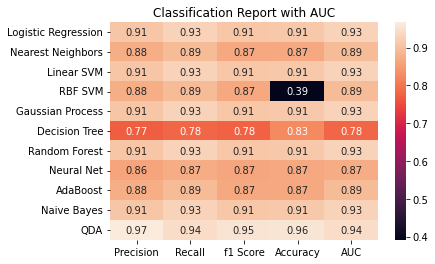

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.heatmap(compare_data, annot = True)

name = "Classification Report with AUC"
Class_name = ["Precision", "Recall", "f1 Score", "Accuracy", "AUC"]

ax.set_xticklabels(Class_name)
ax.set_yticklabels(names, rotation='horizontal')


plt.title(name)


plt.show()

#Linear Plot

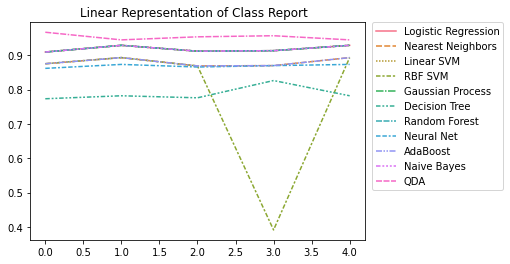

In [ ]:
import seaborn as sns

sns.lineplot(data=compare_data.iloc[:, :11])

plt.title("Linear Representation of Class Report  ")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#QDA k-fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score

#manipulated the cv to produce the highest level of accuracy
scores = cross_val_score(qda_model, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminan

Accuracy: 0.88 (+/- 0.20)


##Determining the number of Fetures using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'reg_param': [0, 0.1, 1, 10]}


grid_search = GridSearchCV(estimator=qda_model, param_grid=param_grid, cv=10)

grid_search.fit(X_res, y_res)

best_hyperparameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

NameError: ignored

In [ ]:
print("Best hyperparameters: ", best_hyperparameters)
print("Best score: ", best_accuracy)

print("List of available parameters: ", qda_model.get_params().keys())

##Applying UFS with PCA Technique

In [ ]:
#extracted tumor class genes
t_x = df4['class'].isin([1])
tumor_x = df4[t_x]
print(tumor_x.shape)


(57, 58736)


In [ ]:
t_y = y.isin([1])
tumor_y = y[t_y]
print(tumor_y.shape)

(57,)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

X_pca = abs(pca.fit_transform(tumor_x))


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

header = df4.columns

print(len(header))

k = 10
selector = SelectKBest(score_func=f_classif, k=k)

X_new = selector.fit_transform(X_pca, tumor_y)
print(y.value_counts())

mask = selector.get_support()
print(len(mask))

selected_header = [header[i] for i, x in enumerate(mask) if x]

extracted_features = pd.DataFrame(data=X_new, columns=selected_header)

header_df = pd.DataFrame(data=header, columns=['header'])

result = pd.concat([header_df, extracted_features], axis=1)



58736
1    57
0    31
Name: class, dtype: int64
57


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [ ]:
print(X_new.shape)
result = result.head(10)
result = result.drop('header', axis = 1)

(57, 10)


In [ ]:
print(result.head(5))


   ENSG00000004139  ENSG00000004142  ENSG00000004399  ENSG00000004455  \
0         7.532712         4.214933         0.878545         3.864689   
1         0.818142         1.394575         0.292131         0.717469   
2         0.415704         0.508660         1.582967         3.982972   
3         0.596686         0.751296         1.103833         0.605237   
4         0.488662         3.724667         2.456480         4.350388   

   ENSG00000004468  ENSG00000004478  ENSG00000004487  ENSG00000004534  \
0         1.054819         2.685564         0.072220         2.490519   
1         0.407136         1.758345         0.198240         0.042381   
2         2.138629         1.130017         1.116178         0.965688   
3         2.451473         1.817322         1.436954         1.046382   
4         2.000490         0.255954         3.343995         2.715517   

   ENSG00000004660  ENSG00000004700  
0         0.837601     9.732628e-13  
1         0.297540     9.732628e-13  
2       

#GRAPHS

#Linear Graph

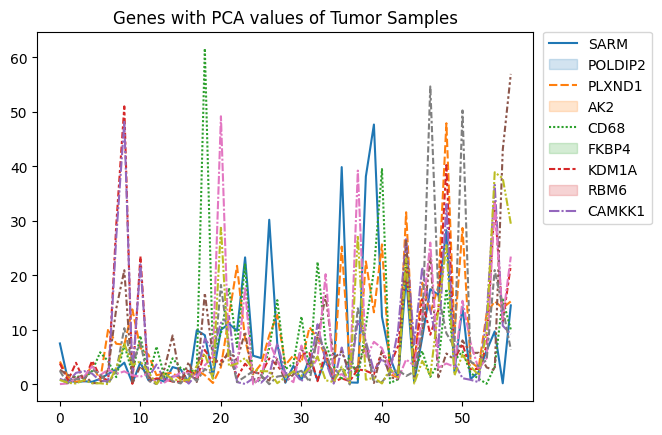

In [ ]:
import seaborn as sns

genes_name = ["SARM", "POLDIP2", "PLXND1", "AK2", "CD68", "FKBP4",
              "KDM1A", "RBM6", "CAMKK1"]
sns.lineplot(data=extracted_features.iloc[:, :9])

plt.title("Genes with PCA values of Tumor Samples")

plt.legend(genes_name,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#Pairplot

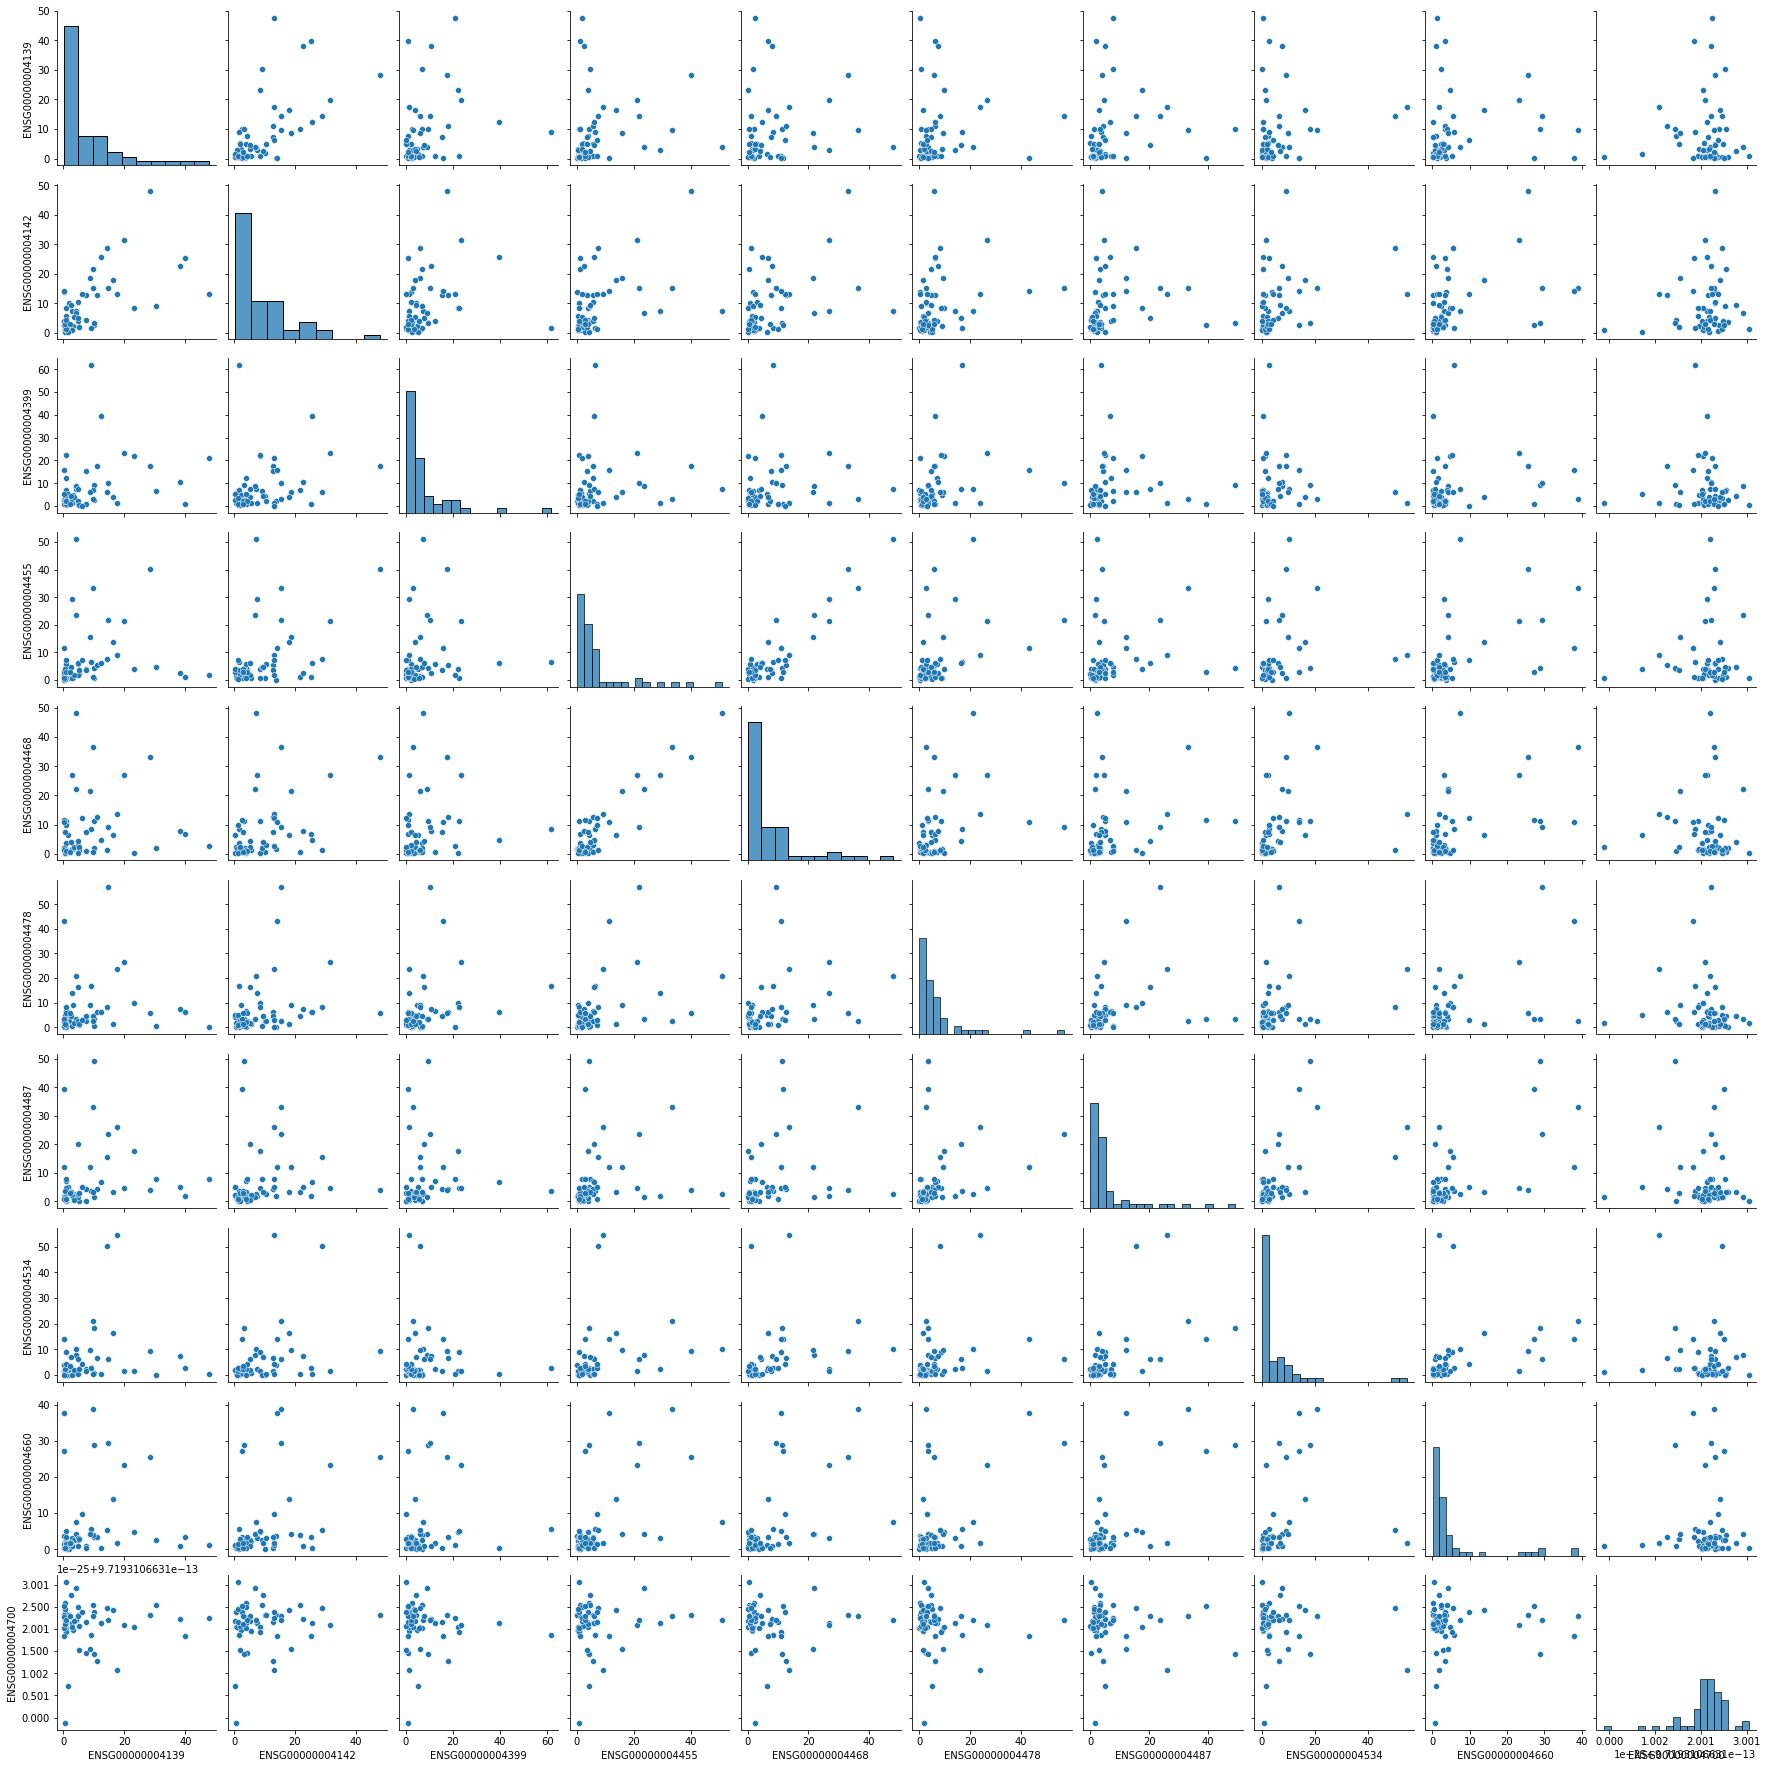

In [ ]:
import seaborn as pairplot

ax = sns.pairplot(extracted_features)

plt.savefig("top_10_Pairplot.png")

plt.show()

#Heatmap

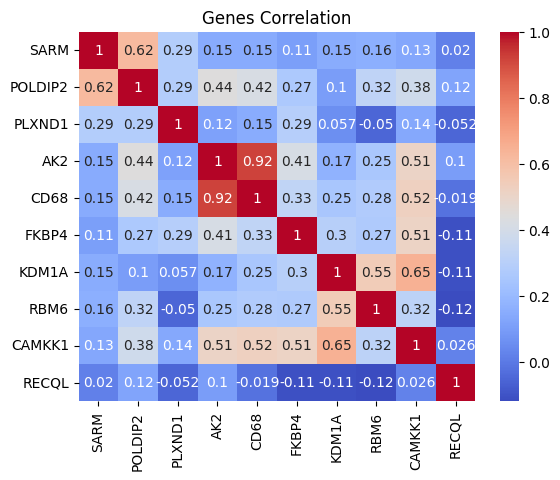

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = extracted_features.corr()

ax = sns.heatmap(corr, cmap='coolwarm', annot = True)

name = "Genes Correlation"
genes_name = ["SARM", "POLDIP2", "PLXND1", "AK2", "CD68", "FKBP4",
              "KDM1A", "RBM6", "CAMKK1", "RECQL"]

ax.set_xticklabels(genes_name)
ax.set_yticklabels(genes_name)


plt.title(name)


plt.savefig("top_10_heatmap.png")

plt.show()

#Bar plot

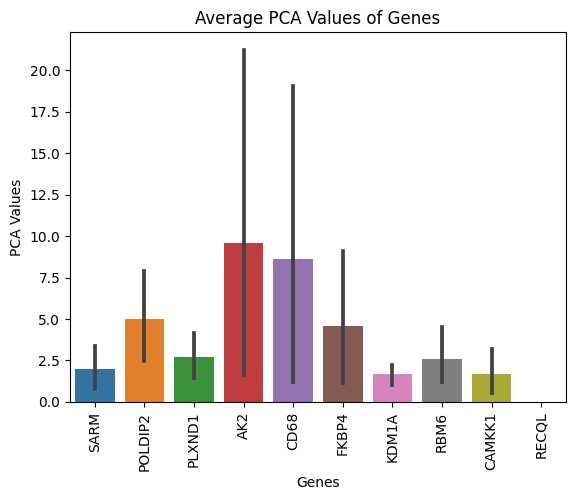

In [ ]:

ax = sns.barplot(data =extracted_features[:10])

genes_name = ["SARM", "POLDIP2", "PLXND1", "AK2", "CD68", "FKBP4",
              "KDM1A", "RBM6", "CAMKK1", "RECQL"]

ax.set_xticklabels(genes_name)
plt.xticks(rotation=90)
plt.title("Average PCA Values of Genes")

plt.xlabel('Genes')
plt.ylabel('PCA Values')
plt.show()


#Saving my model and downlaoding


In [ ]:
import pickle

# Save the model
with open("QDA_model.pkl", "wb") as f:
    pickle.dump(qda_model, f)

# Load the model
with open("QDA_model.pkl", "rb") as f:
    best_model = pickle.load(f)